In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import unicodedata
import matplotlib.pyplot as plt

'Penalties saved','Saves','Errors lead to goal','Clean sheets','Aerial duels won %','Total duels won %','Penalty committed','Goals conceded inside the box','Goals conceded outside the box','Total passe'

'Penalties saved','Saves','Errors lead to goal','Clean sheets','Aerial duels won %','Total duels won %','Penalty committed','Goals conceded inside the box','Goals conceded outside the box','Total passes','Accurate long balls %','Accurate passes %'

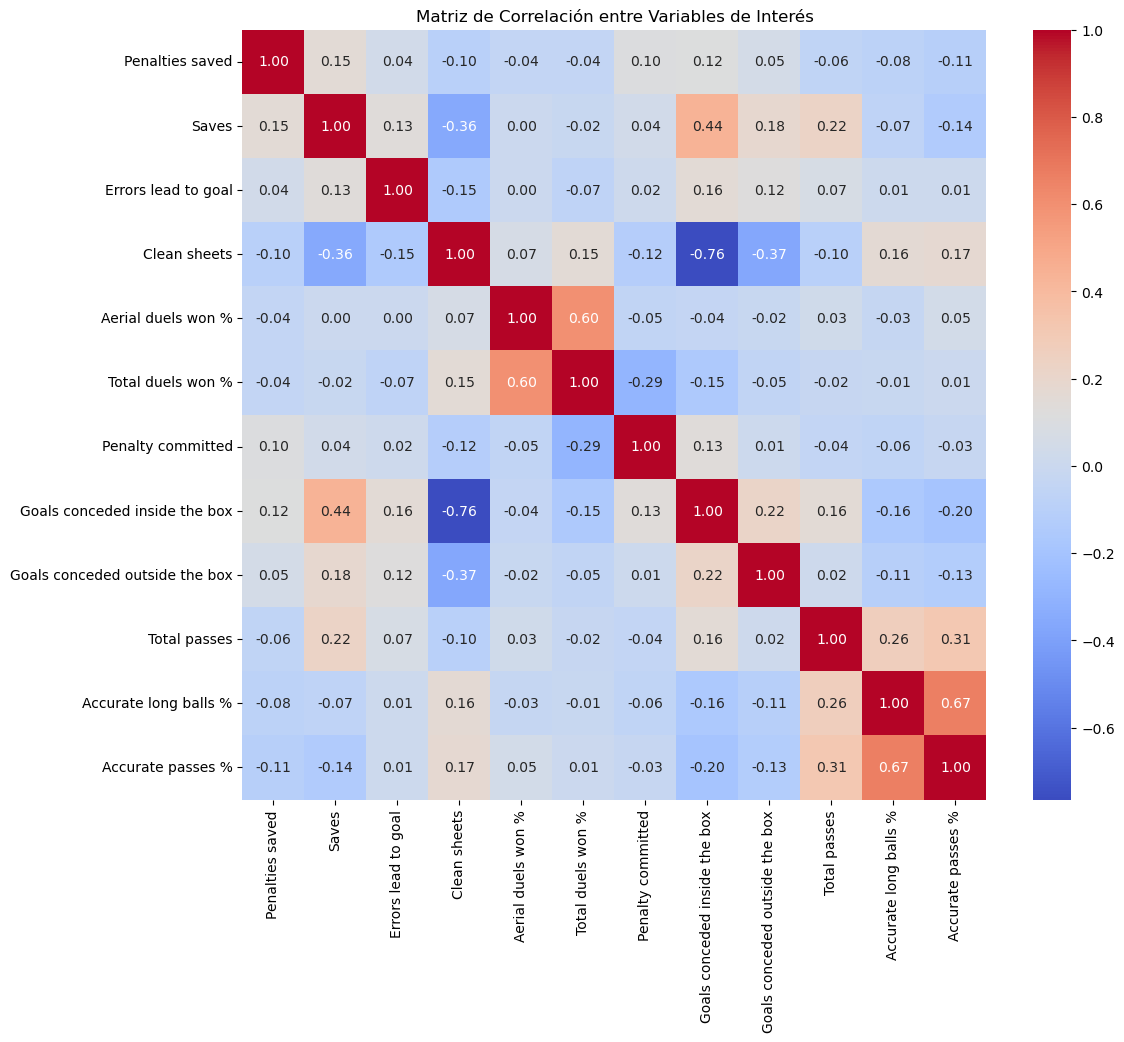

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data=pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Data Posición\df_porteros_medias.csv")

# Seleccionar las variables de interés
variables_interes = ['Penalties saved','Saves','Errors lead to goal','Clean sheets','Aerial duels won %','Total duels won %','Penalty committed','Goals conceded inside the box','Goals conceded outside the box','Total passes','Accurate long balls %','Accurate passes %']

# Crear un nuevo DataFrame con solo las variables de interés
df_interes = Data[variables_interes]

# Calcular la matriz de correlación
correlacion = df_interes.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables de Interés')
plt.show()

In [3]:
Data

,Name,Interceptions,Penalty committed,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,...,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level
0,Brian Heras,0.000000,0.000000,0.000000,0.000000,23.710000,54.520000,43.08000,4.210000,0.500000,...,0.000000,0.570000,0.140000,66.670000,85.710000,14.000000,2.0,1.0,Ecuador Serie A,3.0
1,Alexander Domínguez,0.000000,0.000000,0.000000,0.000000,23.000000,77.130000,53.85000,3.410000,0.520000,...,0.070000,0.520000,0.070000,100.000000,100.000000,27.000000,3.0,1.0,Ecuador Serie A,3.0
2,Rafael Romo,0.000000,0.000000,0.000000,0.090000,24.650000,74.600000,43.93000,4.040000,0.430000,...,0.000000,1.090000,0.040000,75.000000,75.000000,23.000000,3.0,1.0,Ecuador Serie A,3.0
3,Hernán Galíndez,0.000000,0.000000,0.000000,0.040000,24.910000,57.590000,35.85000,4.040000,0.430000,...,0.000000,1.000000,0.170000,50.000000,60.000000,23.000000,3.0,1.0,Ecuador Serie A,3.0
4,Pedro Ortiz,0.000000,0.000000,0.000000,0.030000,21.000000,68.890000,41.46000,3.370000,0.470000,...,0.030000,0.800000,0.130000,100.000000,85.710000,30.000000,3.0,1.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,Marcos Ledesma,0.060000,0.000000,0.110000,0.060000,24.390000,38.040000,28.38000,3.110000,0.280000,...,0.060000,0.890000,0.280000,66.670000,71.430000,18.000000,2.0,1.0,Argentina LPF,2.0
923,Gabriel Arias,0.000000,0.000000,0.040000,0.130000,25.540000,72.100000,39.35000,2.420000,0.250000,...,0.000000,1.040000,0.210000,83.330000,75.000000,24.000000,3.0,1.0,Argentina LPF,2.0
924,Federico Lanzillota,0.070000,0.000000,0.070000,0.070000,27.070000,81.270000,50.00000,1.790000,0.430000,...,0.000000,0.790000,0.290000,50.000000,62.500000,14.000000,3.0,1.0,Argentina LPF,2.0
925,Lucas Acosta,0.060000,0.000000,0.170000,0.000000,28.500000,64.330000,34.53000,2.670000,0.390000,...,0.000000,0.670000,0.280000,50.000000,33.330000,18.000000,2.0,1.0,Argentina LPF,2.0


In [4]:
Data = Data.fillna(0)

In [5]:
Data.columns

Index(['Name', 'Interceptions', 'Penalty committed', 'Errors lead to goal',
       'Dribbled past', 'Total passes', 'Accurate passes %',
       'Accurate long balls %', 'Saves', 'Clean sheets', 'Penalties faced',
       'Penalties saved', 'Goals conceded inside the box',
       'Goals conceded outside the box', 'Aerial duels won %',
       'Total duels won %', 'Appearances', 'Age Range', 'Position', 'League',
       'Level'],
      dtype='object')

In [6]:
columnas_a_dividir = ['Total passes', 'Accurate passes %',
       'Accurate long balls %','Aerial duels won %',
       'Total duels won %']

# Divide todos los datos de las columnas por 10
Data[columnas_a_dividir] = Data[columnas_a_dividir] / 100

In [7]:
Data

,Name,Interceptions,Penalty committed,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,...,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level
0,Brian Heras,0.000000,0.000000,0.000000,0.000000,0.237100,0.545200,0.430800,4.210000,0.500000,...,0.000000,0.570000,0.140000,0.666700,0.857100,14.000000,2.0,1.0,Ecuador Serie A,3.0
1,Alexander Domínguez,0.000000,0.000000,0.000000,0.000000,0.230000,0.771300,0.538500,3.410000,0.520000,...,0.070000,0.520000,0.070000,1.000000,1.000000,27.000000,3.0,1.0,Ecuador Serie A,3.0
2,Rafael Romo,0.000000,0.000000,0.000000,0.090000,0.246500,0.746000,0.439300,4.040000,0.430000,...,0.000000,1.090000,0.040000,0.750000,0.750000,23.000000,3.0,1.0,Ecuador Serie A,3.0
3,Hernán Galíndez,0.000000,0.000000,0.000000,0.040000,0.249100,0.575900,0.358500,4.040000,0.430000,...,0.000000,1.000000,0.170000,0.500000,0.600000,23.000000,3.0,1.0,Ecuador Serie A,3.0
4,Pedro Ortiz,0.000000,0.000000,0.000000,0.030000,0.210000,0.688900,0.414600,3.370000,0.470000,...,0.030000,0.800000,0.130000,1.000000,0.857100,30.000000,3.0,1.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,Marcos Ledesma,0.060000,0.000000,0.110000,0.060000,0.243900,0.380400,0.283800,3.110000,0.280000,...,0.060000,0.890000,0.280000,0.666700,0.714300,18.000000,2.0,1.0,Argentina LPF,2.0
923,Gabriel Arias,0.000000,0.000000,0.040000,0.130000,0.255400,0.721000,0.393500,2.420000,0.250000,...,0.000000,1.040000,0.210000,0.833300,0.750000,24.000000,3.0,1.0,Argentina LPF,2.0
924,Federico Lanzillota,0.070000,0.000000,0.070000,0.070000,0.270700,0.812700,0.500000,1.790000,0.430000,...,0.000000,0.790000,0.290000,0.500000,0.625000,14.000000,3.0,1.0,Argentina LPF,2.0
925,Lucas Acosta,0.060000,0.000000,0.170000,0.000000,0.285000,0.643300,0.345300,2.670000,0.390000,...,0.000000,0.670000,0.280000,0.500000,0.333300,18.000000,2.0,1.0,Argentina LPF,2.0


In [8]:
#Variables para el gráfico nº2

Saves_media = Data["Saves"].mean()
Saves_min = Data["Saves"].min()
Saves_max = Data["Saves"].max()
print(Saves_media)
print(Saves_min)
print(Saves_max)
print("-"*100)
Clean_sheets_media = Data["Clean sheets"].mean()
Clean_sheets_min = Data["Clean sheets"].min()
Clean_sheets_max = Data["Clean sheets"].max()
print(Clean_sheets_media)
print(Clean_sheets_min)
print(Clean_sheets_max)
print("-"*100)
pases_media = Data["Accurate passes %"].mean()
pases_min = Data["Accurate passes %"].min()
pases_max = Data["Accurate passes %"].max()
print(pases_media)
print(pases_min)
print(pases_max)
print("-"*100)
duels_won_media = Data["Total duels won %"].mean()
duels_won_min = Data["Total duels won %"].min()
duels_won_max = Data["Total duels won %"].max()
print(duels_won_media)
print(duels_won_min)
print(duels_won_max)
Goals_conceded_outside_media = Data["Goals conceded outside the box"].mean()
Goals_conceded_outside_min = Data["Goals conceded outside the box"].min()
Goals_conceded_outside_max = Data["Goals conceded outside the box"].max()
print(Goals_conceded_outside_media)
print(Goals_conceded_outside_min)
print(Goals_conceded_outside_max)
print("-"*100)
Errors_lead_to_goal_media = Data["Errors lead to goal"].mean()
Errors_lead_to_goal_min = Data["Errors lead to goal"].min()
Errors_lead_to_goal_max = Data["Errors lead to goal"].max()
print(Errors_lead_to_goal_media)
print(Errors_lead_to_goal_min)
print(Errors_lead_to_goal_max)
print("-"*100)

2.8811663066954645
1.17
5.0
----------------------------------------------------------------------------------------------------
0.28301295896328293
0.0
0.7
----------------------------------------------------------------------------------------------------
0.6407237580993521
0.3136
0.8996
----------------------------------------------------------------------------------------------------
0.8253186825053994
0.0
1.0
0.17251619870410367
0.0
0.67
----------------------------------------------------------------------------------------------------
0.032095032397408206
0.0
0.31
----------------------------------------------------------------------------------------------------


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
Columna_habilidades = Data.columns.drop(["Name", "League"])
features = Data[Columna_habilidades]
# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)
# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=5)  # Buscamos 4 vecinos porque uno de ellos será el jugador mismo
# Ajusta el modelo a tus datos
model.fit(features_scaled)
caracteristicas_grafico = ['Total passes','Penalties saved','Aerial duels won %','Errors lead to goal','Total duels won %','Saves','Clean sheets','Penalty committed','Goals conceded inside the box','Goals conceded outside the box']

#caracteristicas_grafico = ['Goals conceded inside the box', 'Clean sheets', 'Total duels won %', 'Penalties saved', 'Saves', 'Goals conceded outside the box','Errors lead to goal']#'Accurate long balls %'
# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

# ... (código anterior)
def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    jugador = Data[Data['Name'] == nombre]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])  # Normalización para el modelo
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0][0:]]  # Excluimos el primer resultado porque será el jugador mismo
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
        
        # Agregar 'Media' a la lista de jugadores similares antes de mostrar el DataFrame
        jugadores_similares = pd.concat([jugadores_similares, Data[Data['Name'] == 'Media']])
        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares[caracteristicas_grafico].values):  # Usamos los valores originales aquí
            fig.add_trace(go.Scatterpolar(
                r=row,
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name']
            ))
        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 5]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()
               # Configura una cuadrícula de subplots con 3 filas y 2 columnas
        fig, axs = plt.subplots(3, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario
        # Gráfico de dispersión para Saves
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Saves'], color=colores[i % len(colores)], marker='o')
        for line in [Saves_max, Saves_media, Saves_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Salvadas de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Saves')
        # Gráfico de dispersión para Clean sheets
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Clean sheets'], color=colores[i % len(colores)], marker='o')
        for line in [Clean_sheets_max, Clean_sheets_media, Clean_sheets_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Comparativa de Porteria limpia de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Clean sheets')
        # Gráfico de dispersión para Accurate passes %
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Accurate passes %'], color=colores[i % len(colores)], marker='o')
        for line in [pases_max, pases_media, pases_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Comparativa de Pases efectivos de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('Accurate passes %')
        # Gráfico de dispersión para Total duels won %
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Total duels won %'], color=colores[i % len(colores)], marker='o')
        for line in [duels_won_max, duels_won_media, duels_won_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Comparativa de Duelos ganados de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('Total duels won %')
        # Gráfico de dispersión para Errors lead to goal
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Errors lead to goal'], color=colores[i % len(colores)], marker='o')
        for line in [Errors_lead_to_goal_max, Errors_lead_to_goal_media, Errors_lead_to_goal_min]:
            axs[2, 0].axhline(y=line, color='r', linestyle='--')
        axs[2, 0].set_title('Comparativa de Errors lead to goal de los jugadores similares')
        axs[2, 0].set_xticks(range(len(jugadores_similares)))
        axs[2, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 0].set_xlabel('Jugadores')
        axs[2, 0].set_ylabel('Errors lead to goal')
        # Gráfico de dispersión para Goals conceded outside the box
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Goals conceded outside the box'], color=colores[i % len(colores)], marker='o')
        for line in [Goals_conceded_outside_max,Goals_conceded_outside_media, Goals_conceded_outside_min]:
            axs[2, 1].axhline(y=line, color='r', linestyle='--')
        axs[2, 1].set_title('Comparativa de Goals conceded outside the box de los jugadores similares')
        axs[2, 1].set_xticks(range(len(jugadores_similares)))
        axs[2, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 1].set_xlabel('Jugadores')
        axs[2, 1].set_ylabel('Goals conceded outside the box')
        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()
        return



,Name,Interceptions,Penalty committed,Errors lead to goal,Dribbled past,Total passes,Accurate passes %,Accurate long balls %,Saves,Clean sheets,...,Penalties saved,Goals conceded inside the box,Goals conceded outside the box,Aerial duels won %,Total duels won %,Appearances,Age Range,Position,League,Level
869,Jeremías Ledesma,0.060000,0.030000,0.030000,0.120000,0.286200,0.467600,0.332900,3.970000,0.350000,...,0.030000,1.210000,0.210000,0.769200,0.733300,34.000000,2.0,1.0,España La Liga 1,1.0
295,Riccardo Gagno,0.030000,0.050000,0.030000,0.080000,0.293200,0.586200,0.387100,3.270000,0.240000,...,0.030000,1.270000,0.140000,0.769200,0.703700,37.000000,2.0,1.0,Italia Serie B,2.0
241,Jordan Pickford,0.110000,0.030000,0.050000,0.030000,0.312400,0.518200,0.347500,3.350000,0.220000,...,0.030000,1.380000,0.160000,0.727300,0.684200,37.000000,2.0,1.0,Inglaterra Premier League,1.0
275,Bartłomiej Drągowski,0.030000,0.000000,0.060000,0.110000,0.298300,0.643700,0.351900,3.340000,0.170000,...,0.030000,1.340000,0.290000,0.900000,0.750000,35.000000,2.0,1.0,Italia Serie A,1.0
270,Wladimiro Falcone,0.050000,0.030000,0.080000,0.000000,0.267100,0.448300,0.293900,2.970000,0.160000,...,0.030000,1.030000,0.180000,0.857100,0.863600,38.000000,2.0,1.0,Italia Serie A,1.0
926,Media,0.017991,0.013974,0.032095,0.034406,0.281716,0.640724,0.398942,2.881166,0.283013,...,0.026382,1.117927,0.172516,0.880831,0.825319,25.450324,0.0,0.0,0,0.0


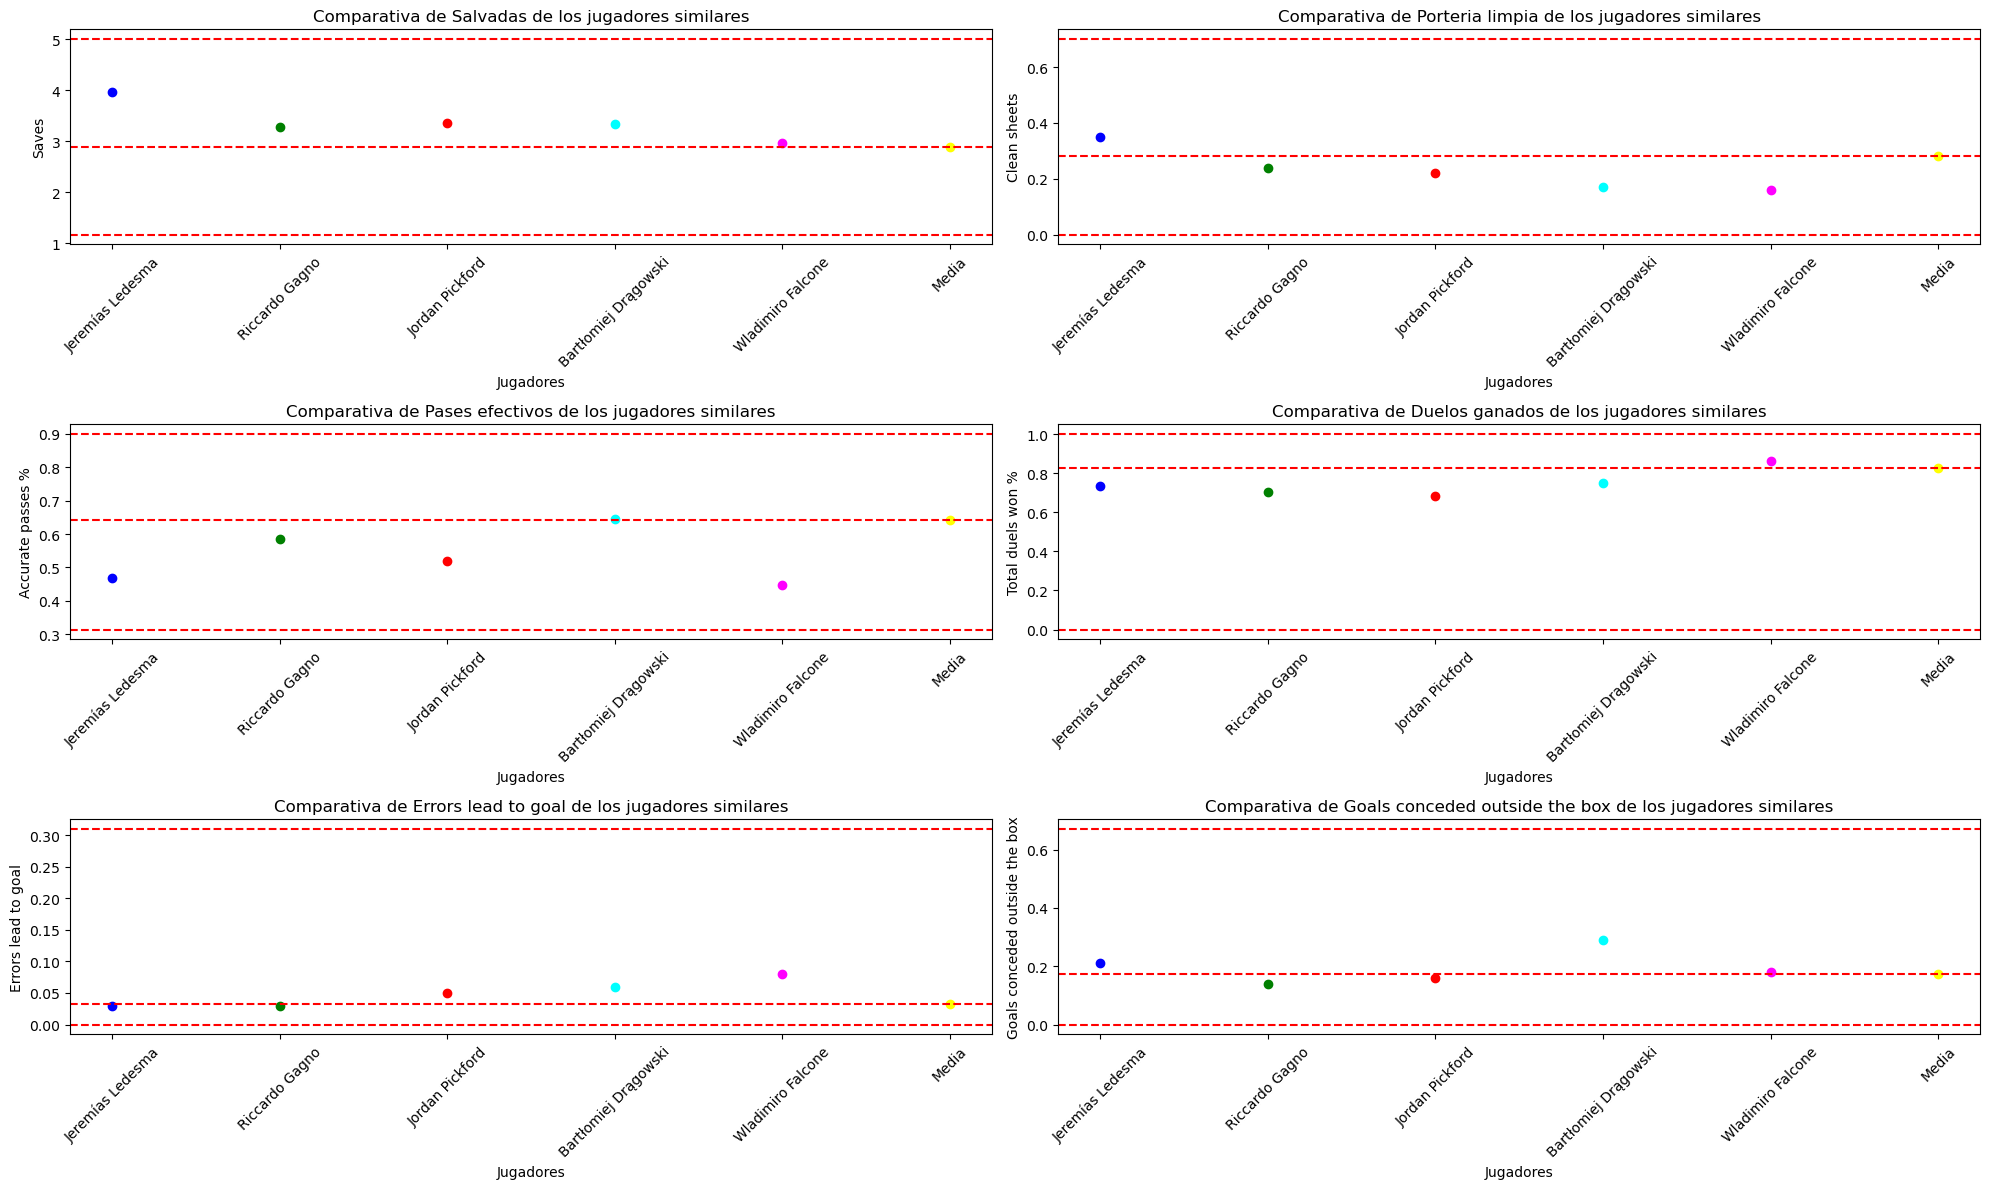

In [11]:
buscar_jugadores_similares('Jeremías Ledesma', caracteristicas_grafico)